In [ ]:
! pip install datasets transformers


In [1]:
from datasets import *
import pandas as pd 
import numpy as np
import os
from PIL import Image 

dataset_root = "D:\Dataset\\breast_cancer\\"

# import json

# file = open("/content/dataset_computerQA.json")
# dataset_json = json.load(file)['intents']

# tokenized_dataset_dict_train = {'input_ids':[], "labels": []}
# tokenized_dataset_dict_validate = {'input_ids':[], "labels": []}

# for idx in range(120):
#   tokenized_dataset_dict_train['input_ids'].append(my_tokenizer(dataset_json[idx]['patterns'][0]))
#   tokenized_dataset_dict_train['labels'].append(my_tokenizer(dataset_json[idx]['responses']))

# for idx in range(120, 172):
#   tokenized_dataset_dict_validate['input_ids'].append(my_tokenizer(dataset_json[idx]['patterns'][0]))
#   tokenized_dataset_dict_validate['labels'].append(my_tokenizer(dataset_json[idx]['responses']))

# train = Dataset.from_dict(tokenized_dataset_dict_train)
# validate = Dataset.from_dict(tokenized_dataset_dict_validate)

# tokenized_dataset = DatasetDict({"train": train, "validate": validate})
# tokenized_dataset


c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EXPLORING DATASET

In [2]:
df_train_calc = pd.read_csv(dataset_root+"csv\calc_case_description_train_set.csv")
df_test_calc = pd.read_csv(dataset_root+"csv\calc_case_description_test_set.csv")

df_train_mass = pd.read_csv(dataset_root+"csv\mass_case_description_train_set.csv")
df_test_mass = pd.read_csv(dataset_root+"csv\mass_case_description_test_set.csv")


In [3]:
print(df_train_calc.shape)
print(df_test_calc.shape)

print(df_train_mass.shape)
print(df_test_mass.shape)


(1546, 14)
(326, 14)
(1318, 14)
(378, 14)


In [4]:
df_train_calc.head()
df_test_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [5]:
df_train_calc['image file path'][0]

'Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm'

In [6]:
os.listdir(dataset_root +'jpeg\\'+ df_train_calc['image file path'][0].split('/')[2])

['1-188.jpg']

In [7]:
# jpeg\1.3.6.1.4.1.9590.100.1.2.126082211045731020508108042042916052\1-240.jpg
# Mass-Training_P_01265_RIGHT_MLO_1
# Mass-Training_P_01265_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.367223375311116112418366281282634244284/1.3.6.1.4.1.9590.100.1.2.61363801911526324605964171543724492889/000000.dcm

DATASET PREPARATION

In [8]:
def get_image_loc(path) -> list:
    img_list = []
    for img in os.listdir(dataset_root +'jpeg\\'+ path.split('/')[2]):
        img_list.append(dataset_root +'jpeg\\'+ path.split('/')[2]+'\\'+img)
    return img_list

In [9]:
print(get_image_loc(df_train_calc['image file path'][120]))

['D:\\Dataset\\breast_cancer\\jpeg\\1.3.6.1.4.1.9590.100.1.2.99456166312612236819044550452017912928\\1-282.jpg']


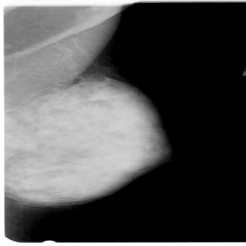

In [10]:
o_img = Image.open(get_image_loc(df_train_calc['image file path'][500])[0])

o_img.resize((int(o_img.size[0] - o_img.size[0]*0.9), int(o_img.size[0] - o_img.size[0]*0.9)))

In [11]:
train_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

validate_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

test_dataset_dict = {
    'image_file_path' : [],
    'image' : [],
    'labels' : []
}

In [13]:
for idx in range(df_train_calc.shape[0]):
    img_loc_list = get_image_loc(df_train_calc['image file path'][idx])
    for img_loc in img_loc_list:
        image_var = Image.open(img_loc)
        image_var = image_var.resize((int(image_var.size[0] - image_var.size[0]*0.9), int(image_var.size[0] - image_var.size[0]*0.9)))
        image_var = image_var.convert('RGB')
        train_dataset_dict['image_file_path'].append(img_loc)
        train_dataset_dict['image'].append(image_var)
        train_dataset_dict['labels'].append(df_train_calc['pathology'][idx])
        del(image_var)

In [14]:
for idx in range(df_train_mass.shape[0]):
    img_loc_list = get_image_loc(df_train_mass['image file path'][idx])
    for img_loc in img_loc_list:
        image_var = Image.open(img_loc)
        image_var = image_var.resize((int(image_var.size[0] - image_var.size[0]*0.9), int(image_var.size[0] - image_var.size[0]*0.9)))
        image_var = image_var.convert('RGB')
        train_dataset_dict['image_file_path'].append(img_loc)
        train_dataset_dict['image'].append(image_var)
        train_dataset_dict['labels'].append(df_train_mass['pathology'][idx])
        del(image_var)

In [15]:
Dataset.from_dict(train_dataset_dict)

KeyboardInterrupt: 

In [16]:
for idx in range(df_test_calc.shape[0]):
    img_loc_list = get_image_loc(df_test_calc['image file path'][idx])
    for img_loc in img_loc_list:
        image_var = Image.open(img_loc)
        image_var = image_var.resize((int(image_var.size[0] - image_var.size[0]*0.9), int(image_var.size[0] - image_var.size[0]*0.9)))
        image_var = image_var.convert('RGB')
        if idx%2 == 0:
            test_dataset_dict['image_file_path'].append(img_loc)
            test_dataset_dict['image'].append(image_var)
            test_dataset_dict['labels'].append(df_test_calc['pathology'][idx])
        else:
            validate_dataset_dict['image_file_path'].append(img_loc)
            validate_dataset_dict['image'].append(Image.open(img_loc))
            validate_dataset_dict['labels'].append(df_test_calc['pathology'][idx])
        del(image_var)
        
for idx in range(df_test_mass.shape[0]):
    img_loc_list = get_image_loc(df_test_mass['image file path'][idx])
    for img_loc in img_loc_list:
        image_var = Image.open(img_loc)
        image_var = image_var.resize((int(image_var.size[0] - image_var.size[0]*0.9), int(image_var.size[0] - image_var.size[0]*0.9)))
        image_var = image_var.convert('RGB')
        if idx%2 == 0:
            test_dataset_dict['image_file_path'].append(img_loc)
            test_dataset_dict['image'].append(image_var)
            test_dataset_dict['labels'].append(df_test_mass['pathology'][idx])
        else:
            validate_dataset_dict['image_file_path'].append(img_loc)
            validate_dataset_dict['image'].append(Image.open(img_loc))
            validate_dataset_dict['labels'].append(df_test_mass['pathology'][idx])
        del(image_var)

In [17]:
Dataset.from_dict(test_dataset_dict)[41]

{'image_file_path': 'D:\\Dataset\\breast_cancer\\jpeg\\1.3.6.1.4.1.9590.100.1.2.127896422011431355705216667061075429849\\1-123.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=4056x6032 at 0x14AB800FE80>,
 'labels': 'MALIGNANT'}

In [18]:
Dataset.from_dict(validate_dataset_dict)[41]

{'image_file_path': 'D:\\Dataset\\breast_cancer\\jpeg\\1.3.6.1.4.1.9590.100.1.2.41576445910017924501198330182143430811\\1-124.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=4152x5864 at 0x14AB8019D90>,
 'labels': 'MALIGNANT'}

In [17]:
dataset = DatasetDict({
    'train':Dataset.from_dict(train_dataset_dict),
    'test':Dataset.from_dict(test_dataset_dict),
    'validate':Dataset.from_dict(validate_dataset_dict)},
)

In [23]:
np.array(dataset['test'][200]['image'])

array([[[ 75,  75,  75],
        [ 43,  43,  43],
        [ 36,  36,  36],
        ...,
        [  9,   9,   9],
        [ 16,  16,  16],
        [ 78,  78,  78]],

       [[ 75,  75,  75],
        [ 42,  42,  42],
        [ 36,  36,  36],
        ...,
        [  9,   9,   9],
        [ 12,  12,  12],
        [ 58,  58,  58]],

       [[ 76,  76,  76],
        [ 43,  43,  43],
        [ 36,  36,  36],
        ...,
        [  9,   9,   9],
        [ 11,  11,  11],
        [ 43,  43,  43]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 15,  15,  15],
        [ 17,  17,  17],
        [ 29,  29,  29]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 26,  26,  26],
        [ 30,  30,  30],
        [ 67,  67,  67]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 36,  36,  36],
        [ 53,  53,  53],
        [117, 117, 117]]

In [24]:
import pickle

ds_file = open("dataset-3", 'ab')

pickle.dump(dataset, ds_file)
ds_file.close()

In [32]:
list(set(df_test_mass['pathology']))

['BENIGN_WITHOUT_CALLBACK', 'MALIGNANT', 'BENIGN']